In [18]:
import cv2
import imutils

from src import config, image_utils, objects_detector
from src.aruco_marker import ArucoMarker
from src.climber_start_position import ClimberStartPosition

## Load image

In [19]:
img = cv2.imread('./../datasets/images/test/34.jpeg')
img = imutils.resize(img, width=1216)

## Load Aruco markers

In [20]:
marker = ArucoMarker(config.MARKER_ARUCO_DICT, img, config.MARKER_PERIMETER_IN_CM)

In [21]:
print("ArUco Perimeter: {}".format(marker.get_perimeter()))
print("Pixels per centimeter: {}".format(marker.get_pixels_per_centimeter()))

print("Width in px: {}".format(marker.get_width()))
print("Width in cm: {}".format(marker.get_width_in_cm()))
print("Height in px: {}".format(marker.get_height()))
print("Height in cm: {}".format(marker.get_height_in_cm()))

ArUco Perimeter: 149.73137283325195
Pixels per centimeter: 5.347549029758999
Width in px: 37.33630940518894
Width in cm: 6.981948028416974
Height in px: 37.05401462729781
Height in cm: 6.929158465138514


## Detect objects

In [22]:
detected_objects = objects_detector.detect(img)


0: 1216x928 82 holds, 1879.4ms
Speed: 9.3ms preprocess, 1879.4ms inference, 0.7ms postprocess per image at shape (1, 3, 1216, 928)


# Draw bounding boxes

In [23]:
img = image_utils.draw_bboxes(
    img,
    detected_objects,
    config.BBOX_COLOR,
    config.BBOX_CENTER_COLOR,
    config.LINE_WIDTH,
    override=False
)

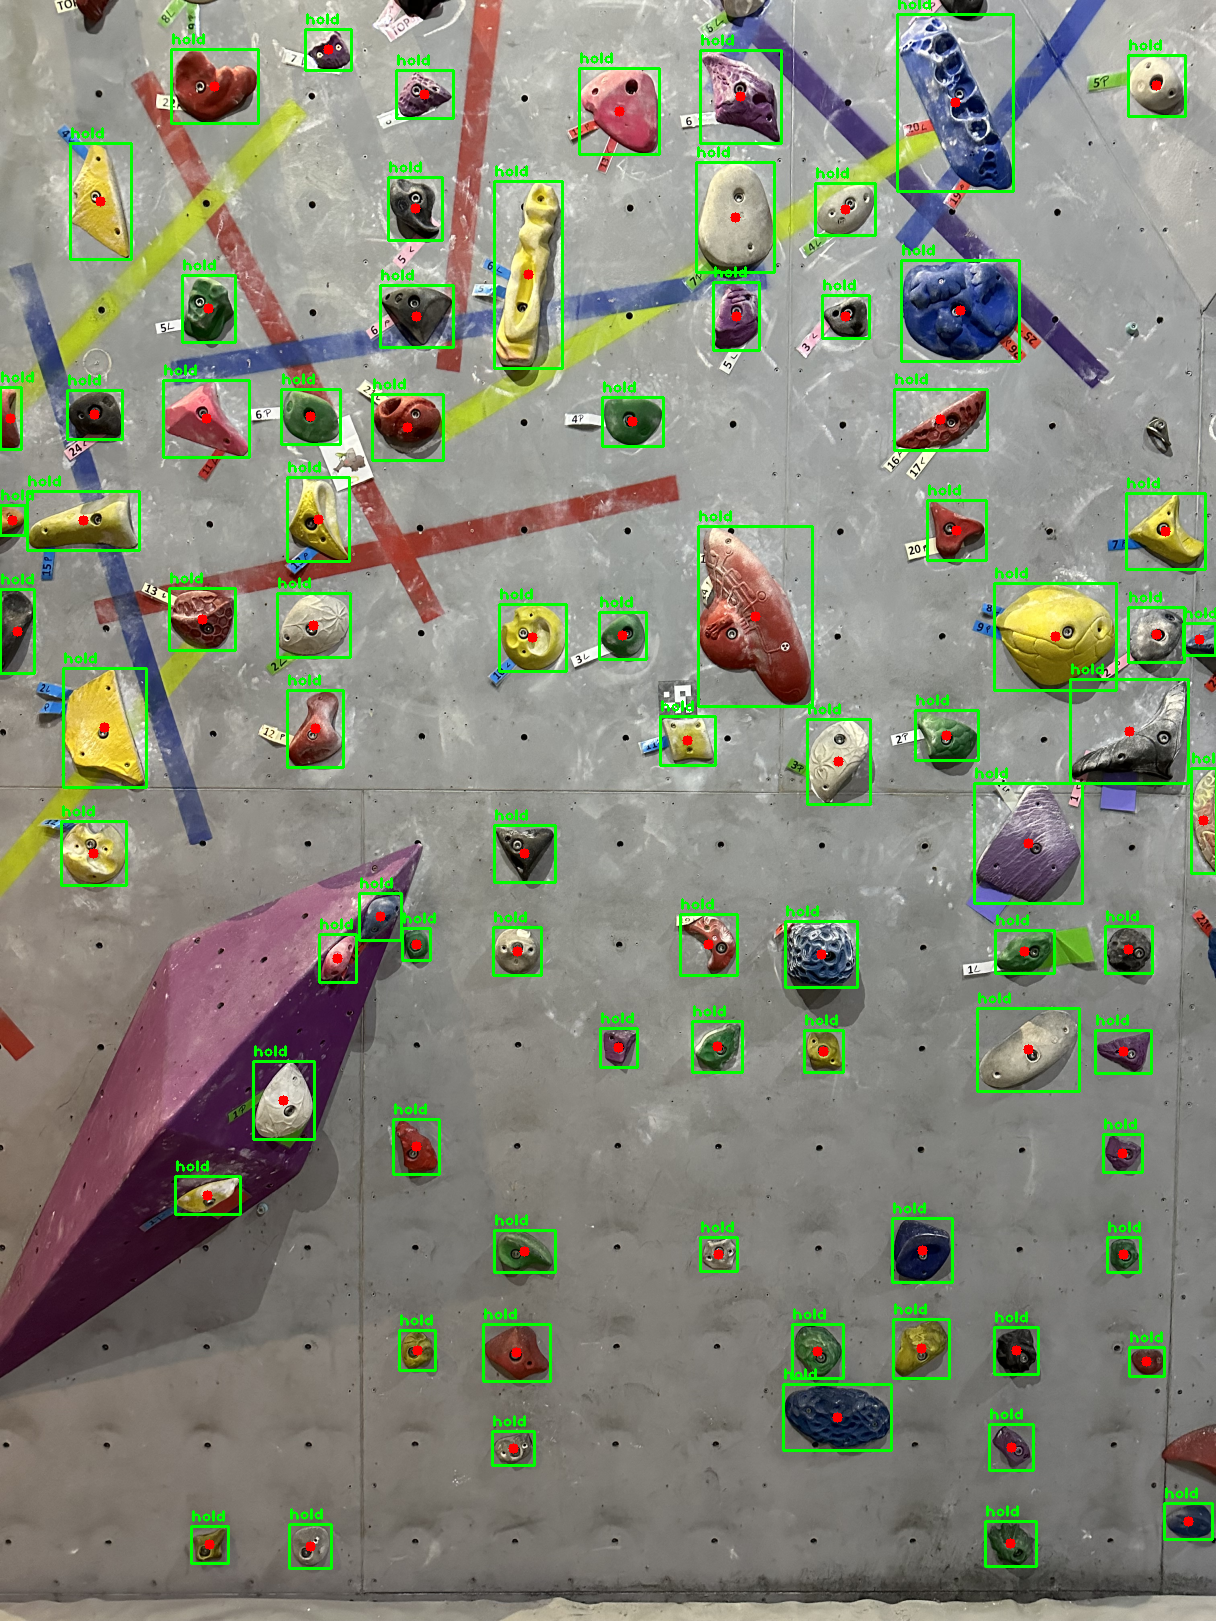

In [24]:
image_utils.display_image(img)

# Find climber starting position

In [25]:
climber_starting_point = ClimberStartPosition(
    img_width=img.shape[1], 
    img_height=img.shape[0], 
    marker=marker, 
    detected_objects=detected_objects
)

In [26]:
climber = climber_starting_point.prepare(
    climber_height_in_cm=config.CLIMBER_HEIGHT_IN_CM,
    starting_steps_max_distance_from_ground_in_cm=40
)

In [27]:
for body_part in [climber.head, climber.neck, climber.trunk, climber.left_shoulder, climber.right_shoulder, climber.left_leg, climber.right_leg, climber.left_hand, climber.right_hand]:
    image_utils.draw_body_part(
        img,
        body_part,
    )
    if body_part.detected_object is not None:
        image_utils.draw_bboxes(
            img=img,
            detected_objects=[body_part.detected_object],
            bbox_color=config.PROBLEM_STEP_BBOX_COLOR,
            bbox_center_color=config.BBOX_CENTER_COLOR,
            line_width=config.LINE_WIDTH
        )
        

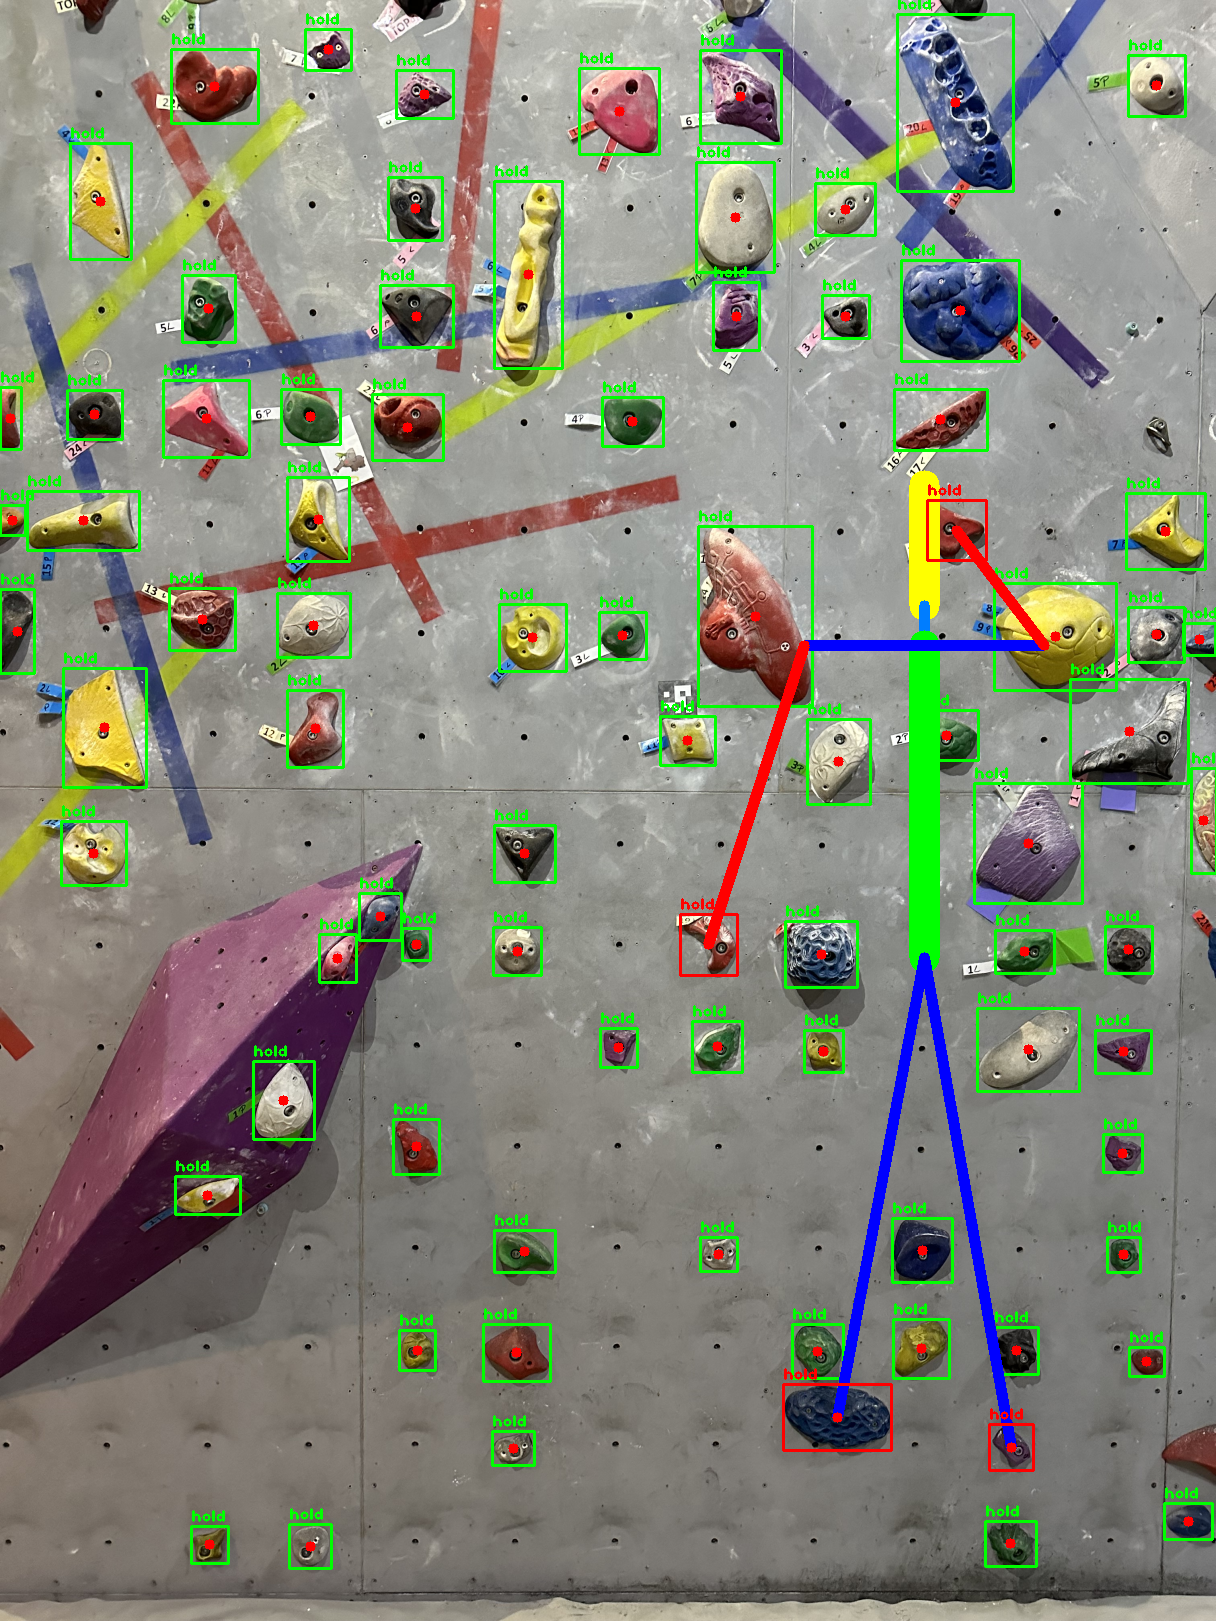

In [28]:
image_utils.display_image(img)